<center><h1>Dataset A: Processing and ML</h1>
<h2><i>Machine Learning</i></h2></center>

*   **Manuel Andrés Hernández Alonso**, `mhernaal70.alumnes@ub.edu`
*   **Camen Casas Herce**, `ccasashe86@alumnes.ub.edu`
*   **Arturo Fredes Cáceres**, `afredeca7@alumnes.ub.edu`



# PREPROCESSING -> Obtaining the final dataset A


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("./train_A_derma.csv")

data["Fake/Real"].replace(['fake', 'real'],
                        [0, 1], inplace=True)

FileNotFoundError: ignored

**Info General**  
Lession $\rightarrow$ can be 0,1 y nan  
Genetic Propensity $\rightarrow$ is between $\pm 3.5$ y nan  
Skin X test $\rightarrow$ can be 1, 2, 3, 4 y nan $\rightarrow$ Categorical column
Skin color $\rightarrow$ can be 0,1 y nan  
S,M,L size, S,M,L$\rightarrow$ can be 0,1 y nan   
Doughnuts consumption $\rightarrow$ is between 0 y 1.5  

## Correlations search

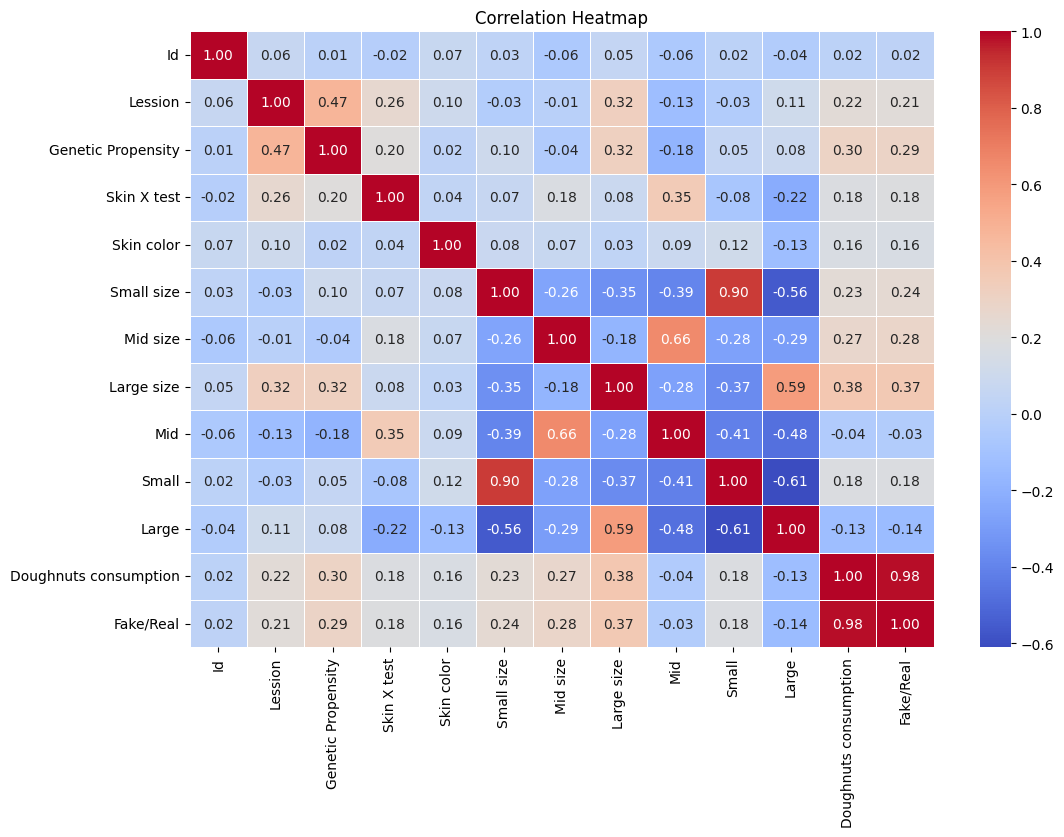

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# You can customize the color palette using cmap parameter
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Doughnuts consumption

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["Fake/Real"], data["Doughnuts consumption"])

plt.show()

In [ ]:
fakes = data.loc[data['Fake/Real'] == 0]
reals = data.loc[data['Fake/Real'] == 1]

print(fakes["Doughnuts consumption"].max())
print(reals["Doughnuts consumption"].min())

print("Threshold:", (fakes["Doughnuts consumption"].max()+reals["Doughnuts consumption"].min())/2)

as we have seen in the matrix correlation that the doughnuts consumption and the real/fake, we have decided to do a threshold about this feature to decide if an id is real or fake. We have seen that all the test have $<0,3$ Doughnut Comsumption so we have decided to test if all were fake.

We have decided to extract information from the test data, testing the accuracy if all are true and all fake, and then if all derma is fake and all news is true.

Formulas obtained:

$\frac{T_a+T_b}{total}$=0.746
$\frac{F_a+T_b}{total}$ =0 0.75968.
As $F_a = 256-T_a$, we have solved $T_a$ and $T_b$ and $T_a = 111(43\%)$ and $T_b = 1187(79\%)$.

(This is tentatively, as we have the accuracy of only half of the test dataset)

Thus, as we have seen that data does not follow the Doughnuts consumption column, we have decided to drop it.


In [ ]:
data.drop(['Doughnuts consumption'], axis=1, inplace=True)

## NaN Dummies

We created Nan dummies before inputing the data set. This way, if there is a relationship between missing values and the data being fake or real, the information will not be lost in the process.

In [ ]:
for column in data.columns:
  print('column ',column,' has ',np.sum(data[column].isnull()),'nans' )
  data['{column}_nan'.format(column=column)]=0.
  data.loc[data[column].isnull(),'{column}_nan'.format(column=column)]=1.
data.drop(['Id_nan'], axis=1, inplace=True)

We looked for some interesting correlations again.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# You can customize the color palette using cmap parameter
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Looking at distributions

### Categorical

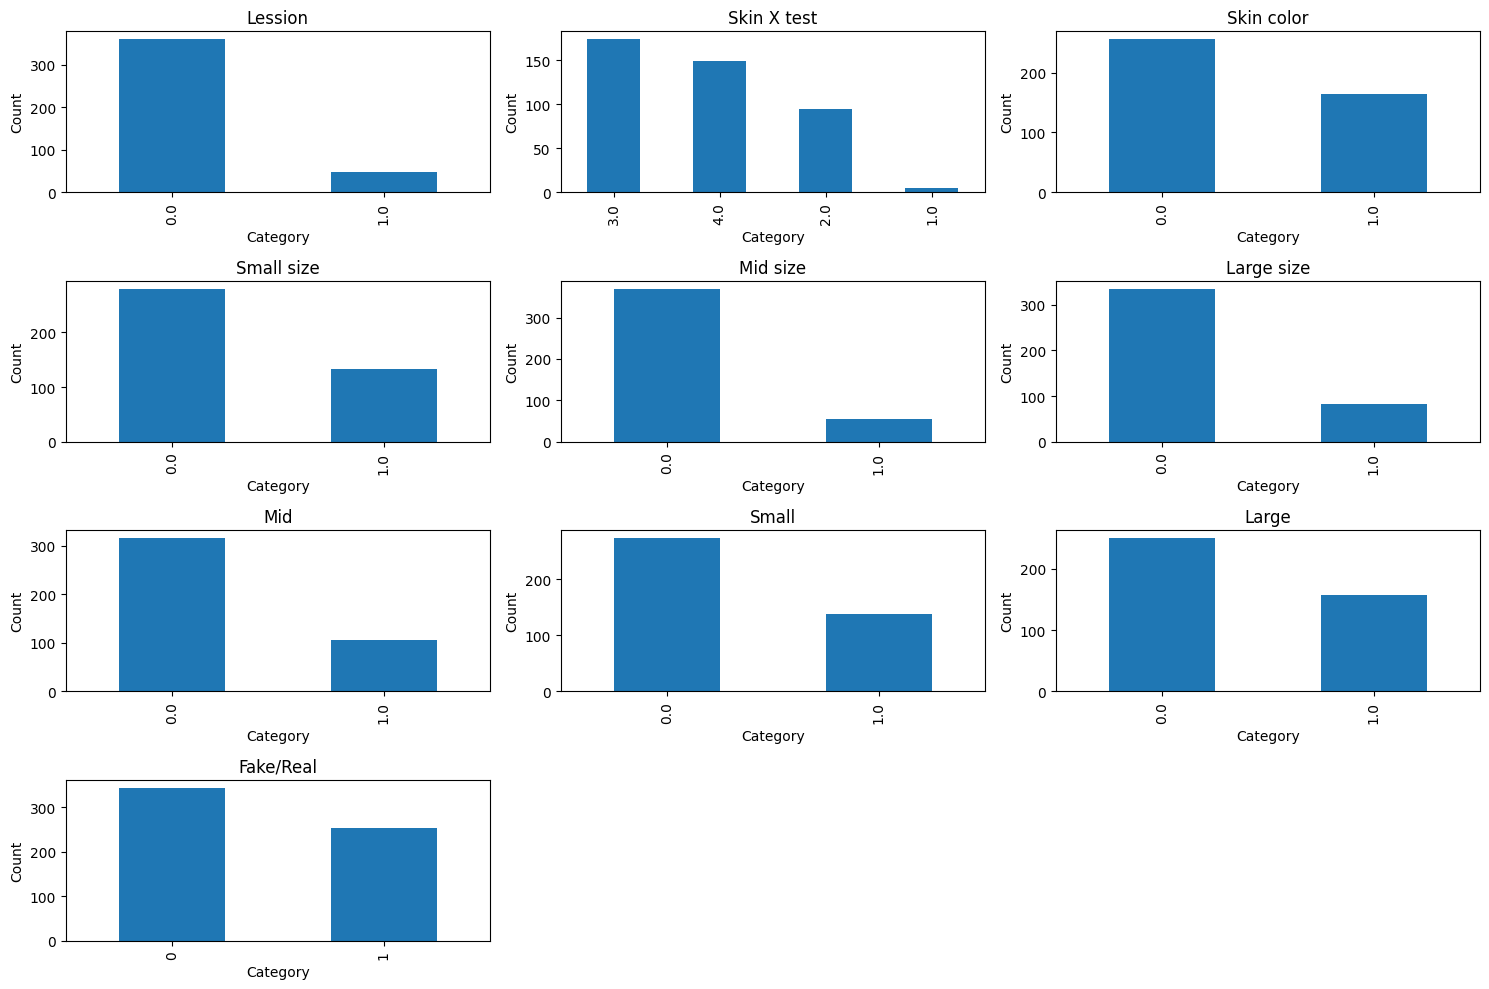

In [ ]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['Lession', 'Skin X test', 'Skin color',
                   'Small size', 'Mid size', 'Large size', 'Mid', 'Small', 'Large',
                   'Fake/Real']

# Create a grid of plots
num_plots = len(columns_to_plot)
num_cols = 3  # You can change the number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create a bar plot for each
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select the current subplot
    data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(column)

# Hide any empty subplots if there are more subplots than plots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Numerical

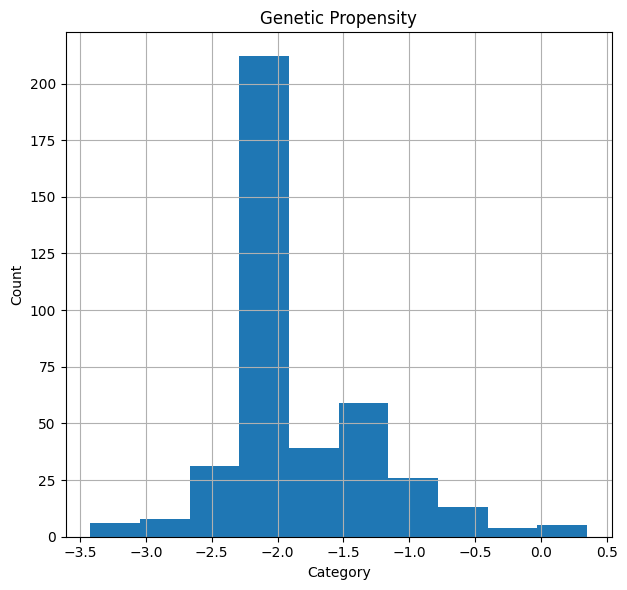

In [ ]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['Genetic Propensity']

# Create a grid of plots
num_plots = len(columns_to_plot)
num_cols = 2  # You can change the number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create a histogram for each
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select the current subplot
    data[column].hist(ax=ax)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(column)

# Hide any empty subplots if there are more subplots than plots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Inputation



#### Inputation of the column 'Genetic Propensity'

In [ ]:
print('column ','Genetic Propensity',' has ',np.sum(data['Genetic Propensity'].isnull()),'nans' )

column  Genetic Propensity  has  194 nans


In [ ]:
import pandas as pd
import numpy as np
import statistics as stat

#We keep a backup of the data without modifications in this column
data_updated_backup = data.copy()

np.random.seed(42)

# We get the statistics of the column without taking into account NaNs
media = np.mean(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
desviacion_estandar = np.std(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
mediana = np.median(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
moda=stat.mode(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])

print(media)
print(desviacion_estandar)
print(mediana)
print(moda)

#Option 1: We impute random data that maintain the statistics of the distribution
cantidad_de_valores_a_imputar = data_updated_backup['Genetic Propensity'].isnull().sum()
valores_imputados = np.random.normal(media, desviacion_estandar, cantidad_de_valores_a_imputar)
#data_updated.loc[data_updated_backup['Genetic Propensity'].isnull(), 'Genetic Propensity'] = valores_imputados

#Option 2, finally used: we impute using the median
data.loc[data_updated_backup['Genetic Propensity'].isnull(), 'Genetic Propensity'] = mediana

#New statistics after imputing
media = np.mean(data['Genetic Propensity'])
desviacion_estandar = np.std(data['Genetic Propensity'])
mediana = np.median(data['Genetic Propensity'])
moda=stat.mode(data['Genetic Propensity'])

print()
print(media)
print(desviacion_estandar)
print(mediana)
print(moda)


-1.8832604125437902
0.5762187178430156
-2.164220094680786
-2.164220094680786

-1.9745605437574874
0.4913743513766449
-2.164220094680786
-2.164220094680786


### Columns related to size


We are going to analyze the 6 columns relatives to the size (small size, mid size and large size) and dimension (small, mid and large). A lesion can be small, mid or large and can have a size small, mid or large. Therefore, for the first 3 columns there can't be more than 1 column with a value = 1 and the same for the second 3 columns. In this way, we can imput some data by using logical rules.

Looking at the size columns:

+ If one of the 3 columns has value = 1, the other 2 have to be 0
+ If 2 columns are 0, the other one **doesn't necessarily** has to be 1
+ If we are missing 2 or 3 values and we have a 0, we cannot infere the NaNs

In the size part we have seen the following correlation: if the 3 columns are 0, then the sample is fake

In [ ]:
data.head()

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,...,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan,Fake/Real_nan
0,0,1.0,-1.27713,4.0,NaN,0.0,NaN,0.0,1.0,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1,NaN,-1.84207,3.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,NaN,-1.82290,3.0,NaN,0.0,NaN,NaN,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,3,1.0,-1.36049,3.0,NaN,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NaN,-2.16422,2.0,0.0,0.0,0.0,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

data_size = data.iloc[:, [0,5,6,7,8,9,10,11]]
data_size.head()

#We check if there is a 1 in the 3 columns of size
data_size_2 = data_size
data_size['Has_1_in_size'] = data_size['Small size']+data_size['Mid size']+data_size['Large size']
data_size.head(60)

#We fill NaNs with -1 to be able to sum them
data_size_no_NAN = data_size.fillna(-1)

#We plot the distribution of the data related to Fake/Real column
resultados = data_size_no_NAN.groupby(['Has_1_in_size', "Fake/Real"]).size().reset_index(name='Count')
print(resultados)

#We extract the rows that fulfills the rule that if there is a 1, the rest have to be 0. We fill those rows.
rows_with_nan = data_size[data_size['Has_1_in_size'].isna()]
rows_with_nan_2 = rows_with_nan[(rows_with_nan['Small size'] == 1) | (rows_with_nan['Mid size'] == 1) | (rows_with_nan['Large size'] == 1)]
rows_with_nan_2['Small size'] = rows_with_nan_2['Small size'].fillna(0.0)
rows_with_nan_2['Mid size'] = rows_with_nan_2['Mid size'].fillna(0.0)
rows_with_nan_2['Large size'] = rows_with_nan_2['Large size'].fillna(0.0)

#We copy these values in the original samples
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small size']
    nuevo_valor_2 = row['Mid size']
    nuevo_valor_3 = row['Large size']
    data_size_2.loc[data_size_2['Id'] == id_a_actualizar, 'Small size'] = nuevo_valor_1
    data_size_2.loc[data_size_2['Id'] == id_a_actualizar, 'Mid size'] = nuevo_valor_2
    data_size_2.loc[data_size_2['Id'] == id_a_actualizar, 'Large size'] = nuevo_valor_3

#We plot the new distributions, filling NaNs with -1 to be able to sum them
data_size_2['Has_1_in_size'] = data_size_2['Small size']+data_size_2['Mid size']+data_size_2['Large size']
data_size_no_NAN_2 = data_size_2.fillna(-1)
resultados = data_size_no_NAN_2.groupby(['Has_1_in_size', 'Fake/Real']).size().reset_index(name='Count')
print(resultados)

   Has_1_in_size  Fake/Real  Count
0           -1.0          0    232
1           -1.0          1    156
2            0.0          0     71
3            1.0          0     41
4            1.0          1     97
   Has_1_in_size  Fake/Real  Count
0           -1.0          0    194
1           -1.0          1     63
2            0.0          0     71
3            1.0          0     79
4            1.0          1    190


Thus we have imputed data in 131 rows for this columns



### Columns related to dimension


If we look to the dimension columns (Small, Mid, Large), we have seen that there are no sample neither in train and test datasets that have all 3 colums = 0, so we can impute more data:

+ If one column is 1, the other two have to be 0
+ If 2 columns are 0, the other one has to be 1
+ If 2 or more are missing and the one we have is a 0, we cannot infere the rest.

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

#we follow an analog process than before

data_dim = data.iloc[:, [0,5,6,7,8,9,10,11]]
data_dim.head()

data_dim_2 = data_dim
data_dim['Has_1_in_dim'] = data_dim['Small']+data_dim['Mid']+data_dim['Large']

data_dim_no_NAN = data_dim.fillna(-1)

#Distribution of the sum of the columns relating to the Fake/Real column
resultados = data_dim_no_NAN.groupby(['Has_1_in_dim', 'Fake/Real']).size().reset_index(name='Count')
print(resultados)

#We check if there is already a 1 in one of the 3 columns
rows_with_nan = data_dim[data_dim['Has_1_in_dim'].isna()]
rows_with_nan_2 = rows_with_nan[(rows_with_nan['Small'] == 1) | (rows_with_nan['Mid'] == 1) | (rows_with_nan['Large'] == 1)]
rows_with_nan_2['Small'] = rows_with_nan_2['Small'].fillna(0.0)
rows_with_nan_2['Mid'] = rows_with_nan_2['Mid'].fillna(0.0)
rows_with_nan_2['Large'] = rows_with_nan_2['Large'].fillna(0.0)
rows_with_nan_2

#We fill with 0 the samples that already have a 1
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small']
    nuevo_valor_2 = row['Mid']
    nuevo_valor_3 = row['Large']
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Small'] = nuevo_valor_1
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Mid'] = nuevo_valor_2
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Large'] = nuevo_valor_3

#Distribution of the sum of the columns relating to the Fake/Real column after first imputation
data_dim_2['Has_1_in_dim'] = data_dim_2['Small']+data_dim_2['Mid']+data_dim_2['Large']
data_dim_no_NAN_2 = data_dim_2.fillna(-1)
resultados = data_dim_no_NAN_2.groupby(['Has_1_in_dim', 'Fake/Real']).size().reset_index(name='Count')
print(resultados)

#We check if we have 2 columns = 0 and the other is a NaN
rows_with_nan = data_dim_2[data_dim_2['Has_1_in_dim'].isna()]
rows_with_nan_2 = rows_with_nan[((rows_with_nan['Small'] == 0) & (rows_with_nan['Mid'] == 0)) | ((rows_with_nan['Mid'] == 0) & (rows_with_nan['Large'] == 0)) | ((rows_with_nan['Small'] == 0) & (rows_with_nan['Large'] == 0))]
rows_with_nan_2['Small'] = rows_with_nan_2['Small'].fillna(1.0)
rows_with_nan_2['Mid'] = rows_with_nan_2['Mid'].fillna(1.0)
rows_with_nan_2['Large'] = rows_with_nan_2['Large'].fillna(1.0)
rows_with_nan_2.head(30)

#For those samples extracted before, we fill the column missing with a 1
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small']
    nuevo_valor_2 = row['Mid']
    nuevo_valor_3 = row['Large']
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Small'] = nuevo_valor_1
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Mid'] = nuevo_valor_2
    data_dim_2.loc[data_dim_2['Id'] == id_a_actualizar, 'Large'] = nuevo_valor_3

#We check the distribution after the 2 imputationes
data_dim_2['Has_1_in_dim'] = data_dim_2['Small']+data_dim_2['Mid']+data_dim_2['Large']
data_dim_no_NAN_2 = data_dim_2.fillna(-1)
resultados = data_dim_no_NAN_2.groupby(['Has_1_in_dim', 'Fake/Real']).size().reset_index(name='Count')
print(resultados)

   Has_1_in_dim  Fake/Real  Count
0          -1.0          0    232
1          -1.0          1    160
2           1.0          0    112
3           1.0          1     93
   Has_1_in_dim  Fake/Real  Count
0          -1.0          0    114
1          -1.0          1     81
2           1.0          0    230
3           1.0          1    172
   Has_1_in_dim  Fake/Real  Count
0          -1.0          0     59
1          -1.0          1     50
2           1.0          0    285
3           1.0          1    203


In this case we have imputed 283 rows

In [ ]:
#We update the values into the original dataset

data['Small size']=data_size_2['Small size']
data['Mid size']=data_size_2['Mid size']
data['Large size']=data_size_2['Large size']
data['Small']=data_dim_2['Small']
data['Mid']=data_dim_2['Mid']
data['Large']=data_dim_2['Large']


In [ ]:
data.to_csv('./train_A_derma_data_updated_size_dim.csv')

### Random Sample inputation


In [ ]:
import pandas as pd
import random

def fill_missing_with_random(df, column_name):
    missing_indices = df.index[df[column_name].isnull()].tolist()
    available_data = df[column_name].dropna().tolist()

    for index in missing_indices:
        df.at[index, column_name] = random.choice(available_data)



In [ ]:
data.columns

Index(['Id', 'Lession', 'Genetic Propensity', 'Skin X test', 'Skin color',
       'Small size', 'Mid size', 'Large size', 'Mid', 'Small', 'Large',
       'Fake/Real', 'Lession_nan', 'Genetic Propensity_nan', 'Skin X test_nan',
       'Skin color_nan', 'Small size_nan', 'Mid size_nan', 'Large size_nan',
       'Mid_nan', 'Small_nan', 'Large_nan', 'Fake/Real_nan'],
      dtype='object')

In [ ]:
for column in ['Id', 'Lession', 'Genetic Propensity', 'Skin X test', 'Skin color']:
  print('column ',column,' had ',np.sum(data[column].isnull()),'nans' )
  fill_missing_with_random(data, column)
  print('column ',column,' has ',np.sum(data[column].isnull()),'nans' )


column  Id  had  0 nans
column  Id  has  0 nans
column  Lession  had  190 nans
column  Lession  has  0 nans
column  Genetic Propensity  had  0 nans
column  Genetic Propensity  has  0 nans
column  Skin X test  had  175 nans
column  Skin X test  has  0 nans
column  Skin color  had  177 nans
column  Skin color  has  0 nans


The columns related to size and dimension have some special rules, so we will take them into account when inputing

In [ ]:
print('column ','Small size',' has ',np.sum(data['Small size'].isnull()),'nans' )
print('column ','Mid size',' has ',np.sum(data['Mid size'].isnull()),'nans' )
print('column ','Large size',' has ',np.sum(data['Large size'].isnull()),'nans' )

fill_missing_with_random(data, 'Small size')

missing_indices = data[(data['Small size']==0)&(data['Mid size'].isnull())].index.tolist()
available_data = data['Mid size'].dropna().tolist()
for index in missing_indices:
    data.at[index, 'Mid size'] = random.choice(available_data)

data.loc[(data['Small size']==0)&(data['Mid size']==0)&(data['Large size'].isnull()),'Large size']=1
data.loc[data['Mid size'].isnull(),'Mid size']=0
data.loc[data['Large size'].isnull(),'Large size']=0
print('column ','Small size',' has ',np.sum(data['Small size'].isnull()),'nans' )
print('column ','Mid size',' has ',np.sum(data['Mid size'].isnull()),'nans' )
print('column ','Large size',' has ',np.sum(data['Large size'].isnull()),'nans' )

column  Small size  has  142 nans
column  Mid size  has  110 nans
column  Large size  has  126 nans
column  Small size  has  0 nans
column  Mid size  has  0 nans
column  Large size  has  0 nans


In [ ]:
print('column ','Small',' has ',np.sum(data['Small'].isnull()),'nans' )
print('column ','Mid',' has ',np.sum(data['Mid'].isnull()),'nans' )
print('column ','Large',' has ',np.sum(data['Large'].isnull()),'nans' )

fill_missing_with_random(data, 'Small')

missing_indices = data[(data['Small']==0)&(data['Mid'].isnull())].index.tolist()
available_data = data['Mid'].dropna().tolist()
for index in missing_indices:
    data.at[index, 'Mid'] = random.choice(available_data)


data.loc[(data['Small']==0)&(data['Mid size']==0)&(data['Large'].isnull()),'Large']=1

data.loc[data['Mid'].isnull(),'Mid']=0
data.loc[data['Large'].isnull(),'Large']=0

print('column ','Small',' has ',np.sum(data['Small'].isnull()),'nans' )
print('column ','Mid',' has ',np.sum(data['Mid'].isnull()),'nans' )
print('column ','Large',' has ',np.sum(data['Large'].isnull()),'nans' )

column  Small  has  84 nans
column  Mid  has  72 nans
column  Large  has  83 nans
column  Small  has  0 nans
column  Mid  has  0 nans
column  Large  has  0 nans


## Saving the CSV file

In [ ]:
data.to_csv('./train_A_derma_def.csv')

In [ ]:
import pandas as pd
data = pd.read_csv("./train_A_derma_def.csv")
data.drop(['Unnamed: 0','Fake/Real_nan'], inplace=True,axis=1)

## Dropping rows with more than a minimum value of NaNs in all columns

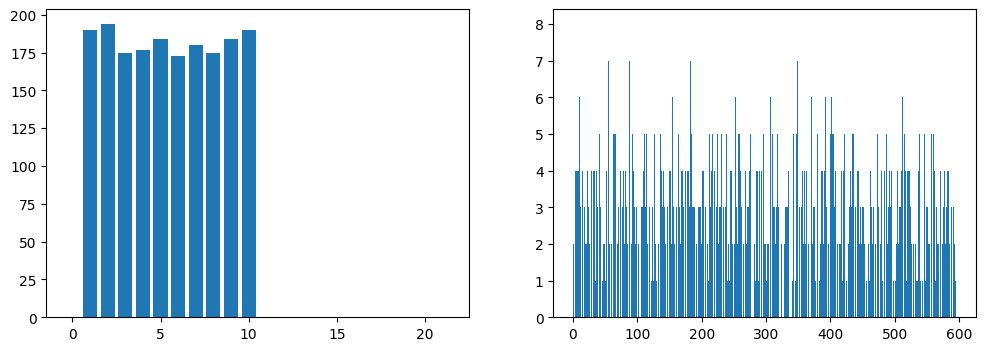

In [ ]:
#NANs distribution related to samples and to features

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#data = data.drop('Doughnuts consumption',axis=1)

v=np.array(data.values[:,:-1],dtype=float)

fig = plt.figure()
sf1 = plt.subplot(1,2,1)
year_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=0)
plt.bar(np.array(range(year_nan.shape[0])),year_nan)
plt.subplot(1,2,2)
concept_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=1)
plt.bar(np.array(range(concept_nan.shape[0])),concept_nan)


fig.set_size_inches((12,4))

In [ ]:
columns_to_check = ['Lession_nan','Genetic Propensity_nan','Skin X test_nan','Skin color_nan','Small size_nan','Mid size_nan','Large size_nan','Mid_nan','Small_nan','Large_nan']  # Lista de columnas a comprobar
data['sum_of_columns'] = data[columns_to_check].sum(axis=1)

# Filter the rows that have more than 6 columns with NaNs
threshold = 6  # Minimum number of NaNs in all 10 columns
rows_to_drop = data['sum_of_columns'] > threshold
  # there are only 7 rows: ids 55	88 154 160 183 216 349

# We eliminate these rows
df_clean = data[~rows_to_drop]
df_clean = df_clean.drop('Id',axis=1)
df_clean
df_clean.insert(0, 'Id', range(0, len(df_clean) ))
df_clean  = df_clean.set_index( 'Id')

#We clean the columns

X_droprow = df_clean.drop(['sum_of_columns','Fake/Real'] ,axis=1).values
y_droprow = df_clean['Fake/Real'].values


# Tranform to Numpy

In [ ]:
X=data.drop(['Fake/Real','Id'],axis=1).values
y=data['Fake/Real'].values

In [ ]:
X.shape, X[0]

((597, 21),
 array([ 1.        , -1.27713001,  4.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         4.        ]))

In [ ]:
y.shape, y[0]

((597,), 1)

# MODEL SELECTION

## Baseline
we will define a baseline to beat that will be predicting all fake

In [ ]:
from sklearn import metrics
import numpy as np
yhat=np.full(y.shape,0)
print ('Accuracy score: ' + str(metrics.accuracy_score(yhat,y)))

##Random forest

### Full dataset

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
acc=0
cv = model_selection.KFold(n_splits = 20 ,shuffle=True ,random_state=42)
cv.get_n_splits(X)

yhat = np.zeros((X.shape[0],1))
for crit in ['gini', 'entropy', 'log_loss']:
  for trees in [5,10,15,20,25]:
    for train_idx, test_idx in cv.split(X):
        X_train,y_train = X[train_idx,:],y[train_idx]
        X_test,y_test = X[test_idx,:],y[test_idx]

        scaler = StandardScaler()
        X_train_scaled=scaler.fit_transform(X_train)

        clf = RandomForestClassifier(n_estimators = trees, criterion=crit)
        clf.fit(X_train_scaled,y_train)

        X_test_scaled = scaler.transform(X_test)

        yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
    print('Accuracy score for ',trees,' trees and ', crit, 'criterion is :' + str(metrics.accuracy_score(yhat,y)))
    if (metrics.accuracy_score(yhat,y))>acc:
      acc=(metrics.accuracy_score(yhat,y))
      best_trees=trees
      best_criterion=crit


Accuracy score for  5  trees and  gini criterion is :0.7855946398659966
Accuracy score for  10  trees and  gini criterion is :0.7587939698492462
Accuracy score for  15  trees and  gini criterion is :0.7839195979899497
Accuracy score for  20  trees and  gini criterion is :0.7738693467336684
Accuracy score for  25  trees and  gini criterion is :0.7939698492462312
Accuracy score for  5  trees and  entropy criterion is :0.7453936348408711
Accuracy score for  10  trees and  entropy criterion is :0.7453936348408711
Accuracy score for  15  trees and  entropy criterion is :0.7805695142378559
Accuracy score for  20  trees and  entropy criterion is :0.7956448911222781
Accuracy score for  25  trees and  entropy criterion is :0.7872696817420436
Accuracy score for  5  trees and  log_loss criterion is :0.7587939698492462
Accuracy score for  10  trees and  log_loss criterion is :0.7822445561139029
Accuracy score for  15  trees and  log_loss criterion is :0.7755443886097152
Accuracy score for  20  tre

In [ ]:
print('Best model:', acc)
print('Trees: ', best_trees)
print('Criterion: ', best_criterion)

Best model: 0.8023450586264657
Trees:  25
Criterion:  log_loss


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

yhat = np.zeros((X.shape[0],1))
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X)

clf = RandomForestClassifier(n_estimators = 25, criterion='log_loss')
clf.fit(X_train_scaled,y)

RandomForestClassifier(criterion='log_loss', n_estimators=25)

### Dropping rows

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
acc=0
cv = model_selection.KFold(n_splits = 20 ,shuffle=True ,random_state=42)
cv.get_n_splits(X_droprow)

yhat = np.zeros((X_droprow.shape[0],1))
for crit in ['gini', 'entropy', 'log_loss']:
  for trees in [5,10,15,20,25]:
    for train_idx, test_idx in cv.split(X_droprow):
        X_train,y_train = X_droprow[train_idx,:],y_droprow[train_idx]
        X_test,y_test = X_droprow[test_idx,:],y_droprow[test_idx]

        scaler = StandardScaler()
        X_train_scaled=scaler.fit_transform(X_train)

        clf = RandomForestClassifier(n_estimators = trees, criterion=crit)
        clf.fit(X_train_scaled,y_train)

        X_test_scaled = scaler.transform(X_test)

        yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
    print('Accuracy score for ',trees,' trees and ', crit, 'criterion is :' + str(metrics.accuracy_score(yhat,y_droprow)))
    if (metrics.accuracy_score(yhat,y_droprow))>acc:
      acc=(metrics.accuracy_score(yhat,y_droprow))
      best_trees=trees
      best_criterion=crit

Accuracy score for  5  trees and  gini criterion is :0.7643097643097643
Accuracy score for  10  trees and  gini criterion is :0.7575757575757576
Accuracy score for  15  trees and  gini criterion is :0.7828282828282829
Accuracy score for  20  trees and  gini criterion is :0.7828282828282829
Accuracy score for  25  trees and  gini criterion is :0.7895622895622896
Accuracy score for  5  trees and  entropy criterion is :0.7626262626262627
Accuracy score for  10  trees and  entropy criterion is :0.7811447811447811
Accuracy score for  15  trees and  entropy criterion is :0.7912457912457912
Accuracy score for  20  trees and  entropy criterion is :0.7676767676767676
Accuracy score for  25  trees and  entropy criterion is :0.7929292929292929
Accuracy score for  5  trees and  log_loss criterion is :0.7760942760942761
Accuracy score for  10  trees and  log_loss criterion is :0.7693602693602694
Accuracy score for  15  trees and  log_loss criterion is :0.7845117845117845
Accuracy score for  20  tre

In [ ]:
print('Best model:', acc)
print('Trees: ', best_trees)
print('Criterion: ', best_criterion)

Best model: 0.7929292929292929
Trees:  25
Criterion:  entropy


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

yhat = np.zeros((X_droprow.shape[0],1))
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_droprow)

clf = RandomForestClassifier(n_estimators = 25, criterion='entropy')
clf.fit(X_train_scaled,y_droprow)

RandomForestClassifier(criterion='entropy', n_estimators=25)

### Predictions

In [ ]:
import pandas as pd
data_test = pd.read_csv("./test_A_derma_def.csv")
X_test=data_test.drop(['Unnamed: 0', 'Id','Doughnuts consumption','Doughnuts consumption_nan'], axis=1)
X_test.shape

(256, 20)

In [ ]:
X_test_scaled=scaler.fit_transform(X_test)
y_hat=clf.predict(X_test_scaled)
data_test['prediction']=y_hat
data_test.loc[data_test['prediction'] == 0,'prediction'] = 'fake'
data_test.loc[data_test['prediction'] == 1,'prediction'] = 'real'

In [ ]:
data_test[['Id','prediction']].to_csv('predicciones_RF_scaled_droprow.csv')

##SVC

In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

#define the vector containing the folds we are going to use and the acc matrix. For each kfold we are going to simulate 50 times
arrayK = np.array([10,20,50,100])
acc=0
iterationK = 0


#for every kfold value
for i in arrayK:
    #print("I'm in k-fold", i)
    #for every iteration
    #X = X.values.astype(float)
    #if j == 25: print("i'm halfway")
    #we initialize X and we shuffle the data and we split it

    cv = model_selection.KFold(n_splits = i ,shuffle=True ,random_state=42)
    cv.get_n_splits(X)

    #we define the prediction, split the data as cv says
    yhat = np.zeros((X.shape[0],1))
    for ker in ['poly', 'rbf']:
        for C_val in [10,1,0.1,100]:
            for train_idx, test_idx in cv.split(X):
                X_train,y_train = X[train_idx,:],y[train_idx]
                X_test,y_test = X[test_idx,:],y[test_idx]

                #we scale the data, we train the model and we scale the test data and we predict what y_test will be (with y_hat)
                scaler = StandardScaler()
                X_train_scaled=scaler.fit_transform(X_train)

                clf = svm.SVC(kernel= ker, degree =6, C=C_val,gamma ='scale',random_state=1)
                clf.fit(X_train_scaled,y_train)

                X_test_scaled = scaler.transform(X_test)

                yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)


            print ('Accuracy score for ',i,' folds, ',ker,' kernel and ', C_val, 'C is :' + str(metrics.accuracy_score(yhat,y)))
            if (metrics.accuracy_score(yhat,y))>acc:
                acc=(metrics.accuracy_score(yhat,y))
                best_kernel=ker
                best_C=C_val
                best_folds=i

In [ ]:
print('Best model:', acc)
print('Kernel: ', best_kernel)
print('C: ', best_C)
print('Folds ', best_folds)

###Trying SVC but with substracting rows with more than 6 NaNs

In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

#define the vector containing the folds we are going to use and the acc matrix. For each kfold we are going to simulate 50 times
arrayK = np.array([10,20,50,100])
acc=0
iterationK = 0


#for every kfold value
for i in arrayK:
    #print("I'm in k-fold", i)
    #for every iteration
    #X = X.values.astype(float)
    #if j == 25: print("i'm halfway")
    #we initialize X and we shuffle the data and we split it

    cv = model_selection.KFold(n_splits = i ,shuffle=True ,random_state=42)
    cv.get_n_splits(X_droprow)

    #we define the prediction, split the data as cv says
    yhat = np.zeros((X_droprow.shape[0],1))
    for ker in ['poly', 'rbf']:
        for C_val in [10,1,0.1,100]:
            for train_idx, test_idx in cv.split(X_droprow):
                X_train,y_train = X_droprow[train_idx,:],y_droprow[train_idx]
                X_test,y_test = X_droprow[test_idx,:],y_droprow[test_idx]

                #we scale the data, we train the model and we scale the test data and we predict what y_test will be (with y_hat)
                scaler = StandardScaler()
                X_train_scaled=scaler.fit_transform(X_train)

                clf = svm.SVC(kernel= ker, degree =6, C=C_val,gamma ='scale',random_state=1)
                clf.fit(X_train_scaled,y_train)

                X_test_scaled = scaler.transform(X_test)

                yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)


            print ('Accuracy score for ',i,' folds, ',ker,' kernel and ', C_val, 'C is :' + str(metrics.accuracy_score(yhat,y_droprow)))
            if (metrics.accuracy_score(yhat,y_droprow))>acc:
                acc=(metrics.accuracy_score(yhat,y_droprow))
                best_kernel=ker
                best_C=C_val
                best_folds=i

Accuracy score for  10  folds,  poly  kernel and  10 C is :0.7070707070707071
Accuracy score for  10  folds,  poly  kernel and  1 C is :0.632996632996633
Accuracy score for  10  folds,  poly  kernel and  0.1 C is :0.5959595959595959
Accuracy score for  10  folds,  poly  kernel and  100 C is :0.7070707070707071
Accuracy score for  10  folds,  rbf  kernel and  10 C is :0.7457912457912458
Accuracy score for  10  folds,  rbf  kernel and  1 C is :0.7744107744107744
Accuracy score for  10  folds,  rbf  kernel and  0.1 C is :0.6212121212121212
Accuracy score for  10  folds,  rbf  kernel and  100 C is :0.7525252525252525
Accuracy score for  20  folds,  poly  kernel and  10 C is :0.7087542087542088
Accuracy score for  20  folds,  poly  kernel and  1 C is :0.6380471380471381
Accuracy score for  20  folds,  poly  kernel and  0.1 C is :0.5959595959595959
Accuracy score for  20  folds,  poly  kernel and  100 C is :0.7037037037037037
Accuracy score for  20  folds,  rbf  kernel and  10 C is :0.744107

In [ ]:
print('Best model:', acc)
print('Kernel: ', best_kernel)
print('C: ', best_C)
print('Folds ', best_folds)

Best model: 0.7777777777777778
Kernel:  rbf
C:  1
Folds  100


## XGboost


In [ ]:
from sklearn import model_selection
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
acc=0
cv = model_selection.KFold(n_splits = 20 ,shuffle=True ,random_state=42)
cv.get_n_splits(X)

yhat = np.zeros((X.shape[0],1))
for train_idx, test_idx in cv.split(X):
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]

    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)

    clf = model = xgb.XGBClassifier()
    clf.fit(X_train_scaled,y_train)

    X_test_scaled = scaler.transform(X_test)

    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
print('Accuracy score for '+str(metrics.accuracy_score(yhat,y)))


Accuracy score for 0.7766798418972332


Without +6 Nan rows

In [ ]:
from sklearn import model_selection
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
acc=0
cv = model_selection.KFold(n_splits = 20 ,shuffle=True ,random_state=42)
cv.get_n_splits(X_droprow)

yhat = np.zeros((X_droprow.shape[0],1))
for train_idx, test_idx in cv.split(X_droprow):
    X_train,y_train = X_droprow[train_idx,:],y_droprow[train_idx]
    X_test,y_test = X_droprow[test_idx,:],y_droprow[test_idx]

    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)

    clf = model = xgb.XGBClassifier()
    clf.fit(X_train_scaled,y_train)

    X_test_scaled = scaler.transform(X_test)

    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
print('Accuracy score for '+str(metrics.accuracy_score(yhat,y_droprow)))


Accuracy score for 0.7811447811447811


In [ ]:
import pandas as pd
data_test = pd.read_csv("./test_A_derma_def.csv")
X_test=data_test.drop(['Unnamed: 0', 'Id','Doughnuts consumption','Doughnuts consumption_nan'], axis=1)
X_test.shape

(256, 20)

In [ ]:
y_hat=clf.predict(X_test)
data_test['prediction']=y_hat
data_test.loc[data_test['prediction'] == 0,'prediction'] = 'fake'
data_test.loc[data_test['prediction'] == 1,'prediction'] = 'real'

In [ ]:
data_test[['Id','prediction']].to_csv('predicciones_xgb_1.csv')

## AutoML

In [ ]:
!pip install deap update_checker tqdm stopit xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=f160b76c217945f9e75b761aa715f9cfebeb4444aac95f2ed6fb35ccab14d226
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.12.1


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.preprocessing import StandardScaler

scaler_auto = StandardScaler()
X_auto=scaler_auto.fit_transform(X_droprow)

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model_tpot = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model_tpot.fit(X_auto, y_droprow)
# export the best model
model_tpot.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8047571571001282

Generation 2 - Current best internal CV score: 0.811508332146418

Generation 3 - Current best internal CV score: 0.811508332146418

Generation 4 - Current best internal CV score: 0.811508332146418

Generation 5 - Current best internal CV score: 0.811508332146418

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=15, n_estimators=100)


In [ ]:
data_test = pd.read_csv("./test_A_derma_def.csv")

X_test=data_test.drop(['Unnamed: 0', 'Id','Doughnuts consumption','Doughnuts consumption_nan'], axis=1)

X_test = scaler_auto.transform(X_test)

yhat = model_tpot.predict(X_test)

data_test['prediction']=yhat
data_test.loc[data_test['prediction'] == 0,'prediction'] = 'fake'
data_test.loc[data_test['prediction'] == 1,'prediction'] = 'real'
data_test[['Id','prediction']].to_csv('pred_tpot.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# PREDICTIONS

## Inputation of test (same procedures as for the Train Dataset)

In [ ]:
import pandas as pd
import numpy as np
import statistics as stat
test = pd.read_csv("./test_A_derma.csv")

In [ ]:
for column in test.columns:
  print('column ',column,' has ',np.sum(test[column].isnull()),'nans' )
  test['{column}_nan'.format(column=column)]=0.
  test.loc[test[column].isnull(),'{column}_nan'.format(column=column)]=1.
test.head()

column  Id  has  0 nans
column  Lession  has  80 nans
column  Genetic Propensity  has  85 nans
column  Skin X test  has  67 nans
column  Skin color  has  76 nans
column  Small size  has  75 nans
column  Mid size  has  80 nans
column  Large size  has  78 nans
column  Mid  has  82 nans
column  Small  has  76 nans
column  Large  has  80 nans
column  Doughnuts consumption  has  0 nans


,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,...,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan,Doughnuts consumption_nan
0,0,NaN,NaN,3.0,NaN,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,NaN,NaN,3.0,1.0,1.0,0.0,0.0,NaN,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.0,NaN,4.0,NaN,NaN,0.0,0.0,NaN,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.0,NaN,2.0,1.0,NaN,1.0,NaN,1.0,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,1.0,-1.84207,4.0,1.0,0.0,1.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

test_size = test.iloc[:, [0,5,6,7,8,9,10]]
test_size.head()

#We check if there is a 1 in the 3 columns of size
test_size_2 = test_size
test_size['Has_1_in_size'] = test_size['Small size']+test_size['Mid size']+test_size['Large size']
test_size.head(60)

#We fill NaNs with -1 to be able to sum them
test_size_no_NAN = test_size.fillna(-1)


#We extract the rows that fulfills the rule that if there is a 1, the rest have to be 0. We fill those rows.
rows_with_nan = test_size[test_size['Has_1_in_size'].isna()]
rows_with_nan_2 = rows_with_nan[(rows_with_nan['Small size'] == 1) | (rows_with_nan['Mid size'] == 1) | (rows_with_nan['Large size'] == 1)]
rows_with_nan_2['Small size'] = rows_with_nan_2['Small size'].fillna(0.0)
rows_with_nan_2['Mid size'] = rows_with_nan_2['Mid size'].fillna(0.0)
rows_with_nan_2['Large size'] = rows_with_nan_2['Large size'].fillna(0.0)

#We copy these values in the original samples
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small size']
    nuevo_valor_2 = row['Mid size']
    nuevo_valor_3 = row['Large size']
    test_size_2.loc[test_size_2['Id'] == id_a_actualizar, 'Small size'] = nuevo_valor_1
    test_size_2.loc[test_size_2['Id'] == id_a_actualizar, 'Mid size'] = nuevo_valor_2
    test_size_2.loc[test_size_2['Id'] == id_a_actualizar, 'Large size'] = nuevo_valor_3

#We plot the new distributions, filling NaNs with -1 to be able to sum them
test_size_2['Has_1_in_size'] = test_size_2['Small size']+test_size_2['Mid size']+test_size_2['Large size']
test_size_no_NAN_2 = test_size_2.fillna(-1)



In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

#we follow an analog process than before

test_dim = test.iloc[:, [0,5,6,7,8,9,10,11]]
test_dim.head()

test_dim_2 = test_dim
test_dim['Has_1_in_dim'] = test_dim['Small']+test_dim['Mid']+test_dim['Large']

test_dim_no_NAN = test_dim.fillna(-1)

#We check if there is already a 1 in one of the 3 columns
rows_with_nan = test_dim[test_dim['Has_1_in_dim'].isna()]
rows_with_nan_2 = rows_with_nan[(rows_with_nan['Small'] == 1) | (rows_with_nan['Mid'] == 1) | (rows_with_nan['Large'] == 1)]
rows_with_nan_2['Small'] = rows_with_nan_2['Small'].fillna(0.0)
rows_with_nan_2['Mid'] = rows_with_nan_2['Mid'].fillna(0.0)
rows_with_nan_2['Large'] = rows_with_nan_2['Large'].fillna(0.0)
rows_with_nan_2

#We fill with 0 the samples that already have a 1
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small']
    nuevo_valor_2 = row['Mid']
    nuevo_valor_3 = row['Large']
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Small'] = nuevo_valor_1
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Mid'] = nuevo_valor_2
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Large'] = nuevo_valor_3

#Distribution of the sum of the columns relating to the Fake/Real column after first imputation
test_dim_2['Has_1_in_dim'] = test_dim_2['Small']+test_dim_2['Mid']+test_dim_2['Large']
test_dim_no_NAN_2 = test_dim_2.fillna(-1)

#We check if we have 2 columns = 0 and the other is a NaN
rows_with_nan = test_dim_2[test_dim_2['Has_1_in_dim'].isna()]
rows_with_nan_2 = rows_with_nan[((rows_with_nan['Small'] == 0) & (rows_with_nan['Mid'] == 0)) | ((rows_with_nan['Mid'] == 0) & (rows_with_nan['Large'] == 0)) | ((rows_with_nan['Small'] == 0) & (rows_with_nan['Large'] == 0))]
rows_with_nan_2['Small'] = rows_with_nan_2['Small'].fillna(1.0)
rows_with_nan_2['Mid'] = rows_with_nan_2['Mid'].fillna(1.0)
rows_with_nan_2['Large'] = rows_with_nan_2['Large'].fillna(1.0)
rows_with_nan_2.head(30)

#For those samples extracted before, we fill the column missing with a 1
for index, row in rows_with_nan_2.iterrows():
    id_a_actualizar = row['Id']
    nuevo_valor_1 = row['Small']
    nuevo_valor_2 = row['Mid']
    nuevo_valor_3 = row['Large']
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Small'] = nuevo_valor_1
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Mid'] = nuevo_valor_2
    test_dim_2.loc[test_dim_2['Id'] == id_a_actualizar, 'Large'] = nuevo_valor_3

#We check the distribution after the 2 imputationes
test_dim_2['Has_1_in_dim'] = test_dim_2['Small']+test_dim_2['Mid']+test_dim_2['Large']
test_dim_no_NAN_2 = test_dim_2.fillna(-1)

In [ ]:
#We update the values into the original test dataset

test['Small size']=test_size_2['Small size']
test['Mid size']=test_size_2['Mid size']
test['Large size']=test_size_2['Large size']
test['Small']=test_dim_2['Small']
test['Mid']=test_dim_2['Mid']
test['Large']=test_dim_2['Large']

In [ ]:
test.to_csv('./test_A_derma_data_updated_size_dim.csv')

In [ ]:
"""for column in data.columns:
  print('column ',column,' has ',np.sum(data[column].isnull()),'nans' )
  data['{column}_nan'.format(column=column)]=0.
  data.loc[data[column].isnull(),'{column}_nan'.format(column=column)]=1."""

"for column in data.columns:\n  print('column ',column,' has ',np.sum(data[column].isnull()),'nans' )\n  data['{column}_nan'.format(column=column)]=0.\n  data.loc[data[column].isnull(),'{column}_nan'.format(column=column)]=1."

In [ ]:

#guardamos una copia de los datos con la columna sin alterar
test_updated_backup = test.copy()

#inicializamos semilla
np.random.seed(42)

# Sacamos las estadísticas de la columna Genetic Propensity sin tener en cuenta los NAN
media = np.mean(test_updated_backup[test_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
desviacion_estandar = np.std(test_updated_backup[test_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
mediana = np.median(test_updated_backup[test_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
moda=stat.mode(test_updated_backup[test_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])


#Imputamos usando la mediana
test.loc[test['Genetic Propensity'].isnull(), 'Genetic Propensity'] = mediana

#valores estadísticos de la nueva distribución
media = np.mean(test['Genetic Propensity'])
desviacion_estandar = np.std(test['Genetic Propensity'])
mediana = np.median(test['Genetic Propensity'])
moda=stat.mode(test['Genetic Propensity'])

print()
print(media)
print(desviacion_estandar)
print(mediana)
print(moda)


-1.9037824250553967
0.5979686385618739
-2.1517300605773926
-2.1517300605773926


In [ ]:
test.drop(['Doughnuts consumption', 'Doughnuts consumption_nan'], axis=1, inplace = True)

In [ ]:
import pandas as pd
import random

def fill_missing_with_random(df, column_name):
    missing_indices = df.index[df[column_name].isnull()].tolist()
    available_data = df[column_name].dropna().tolist()

    for index in missing_indices:
        df.at[index, column_name] = random.choice(available_data)



In [ ]:
print('column ','Small size',' has ',np.sum(test['Small size'].isnull()),'nans' )
print('column ','Mid size',' has ',np.sum(test['Mid size'].isnull()),'nans' )
print('column ','Large size',' has ',np.sum(test['Large size'].isnull()),'nans' )

fill_missing_with_random(test, 'Small size')

missing_indices = test[(test['Small size']==0)&(test['Mid size'].isnull())].index.tolist()
available_data = test['Mid size'].dropna().tolist()
for index in missing_indices:
    test.at[index, 'Mid size'] = random.choice(available_data)


test.loc[(test['Small size']==0)&(test['Mid size']==0)&(test['Large size'].isnull())]=1
test.loc[test['Mid size'].isnull(),'Mid size']=0
test.loc[test['Large size'].isnull(),'Large size']=0
print('column ','Small size',' has ',np.sum(test['Small size'].isnull()),'nans' )
print('column ','Mid size',' has ',np.sum(test['Mid size'].isnull()),'nans' )
print('column ','Large size',' has ',np.sum(test['Large size'].isnull()),'nans' )

column  Small size  has  55 nans
column  Mid size  has  45 nans
column  Large size  has  53 nans
column  Small size  has  0 nans
column  Mid size  has  0 nans
column  Large size  has  0 nans


In [ ]:
print('column ','Small',' has ',np.sum(test['Small'].isnull()),'nans' )
print('column ','Mid',' has ',np.sum(test['Mid'].isnull()),'nans' )
print('column ','Large',' has ',np.sum(test['Large'].isnull()),'nans' )

fill_missing_with_random(test, 'Small')

missing_indices = test[(test['Small']==0)&(test['Mid'].isnull())].index.tolist()
available_data = test['Mid'].dropna().tolist()
for index in missing_indices:
    test.at[index, 'Mid'] = random.choice(available_data)


test.loc[(test['Small']==0)&(test['Mid']==0)&(test['Large'].isnull())]=1
available_data = test['Large'].dropna().tolist()
for index in missing_indices:
    test.at[index, 'Large'] = random.choice(available_data)

test.loc[test['Mid'].isnull(),'Mid']=0
test.loc[test['Large'].isnull(),'Large']=0

print('column ','Small',' has ',np.sum(test['Small'].isnull()),'nans' )
print('column ','Mid',' has ',np.sum(test['Mid'].isnull()),'nans' )
print('column ','Large',' has ',np.sum(test['Large'].isnull()),'nans' )

column  Small  has  20 nans
column  Mid  has  14 nans
column  Large  has  19 nans
column  Small  has  0 nans
column  Mid  has  0 nans
column  Large  has  0 nans


In [ ]:
for column in test.columns:
  print('column ',column,' had ',np.sum(test[column].isnull()),'nans' )
  fill_missing_with_random(test, column)
  print('column ',column,' has ',np.sum(test[column].isnull()),'nans' )


column  Id  had  0 nans
column  Id  has  0 nans
column  Lession  had  61 nans
column  Lession  has  0 nans
column  Genetic Propensity  had  0 nans
column  Genetic Propensity  has  0 nans
column  Skin X test  had  49 nans
column  Skin X test  has  0 nans
column  Skin color  had  61 nans
column  Skin color  has  0 nans
column  Small size  had  0 nans
column  Small size  has  0 nans
column  Mid size  had  0 nans
column  Mid size  has  0 nans
column  Large size  had  0 nans
column  Large size  has  0 nans
column  Mid  had  0 nans
column  Mid  has  0 nans
column  Small  had  0 nans
column  Small  has  0 nans
column  Large  had  0 nans
column  Large  has  0 nans
column  Id_nan  had  0 nans
column  Id_nan  has  0 nans
column  Lession_nan  had  0 nans
column  Lession_nan  has  0 nans
column  Genetic Propensity_nan  had  0 nans
column  Genetic Propensity_nan  has  0 nans
column  Skin X test_nan  had  0 nans
column  Skin X test_nan  has  0 nans
column  Skin color_nan  had  0 nans
column  Skin co

In [ ]:
test

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,...,Lession_nan,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan
0,0,0.0,-2.15173,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0.0,-2.15173,3.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.0,-2.15173,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,0.0,-2.15173,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,1.0,-1.84207,4.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,0.0,-2.16422,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
252,252,0.0,-2.13480,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253,253,0.0,-2.15173,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
254,254,0.0,-2.15173,3.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_updated_nan = test.copy()

In [ ]:
test_updated_nan['Lession_nan'] = test['Lession_nan']
test_updated_nan['Genetic Propensity_nan'] = test['Genetic Propensity_nan']
test_updated_nan['Skin X test_nan'] = test['Skin X test_nan']
test_updated_nan['Skin color_nan'] = test['Skin color_nan']
test_updated_nan['Small size_nan'] = test['Small size_nan']
test_updated_nan['Mid size_nan'] = test['Mid size_nan']
test_updated_nan['Large size_nan'] = test['Large size_nan']
test_updated_nan['Mid_nan'] = test['Mid_nan']
test_updated_nan['Small_nan'] = test['Small_nan']
test_updated_nan['Large_nan'] = test['Large_nan']

In [ ]:
test_updated_nan.to_csv('./test_A_derma_def_final.csv')

In [ ]:
test_updated_nan.head()

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,...,Lession_nan,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan
0,0,0.0,-2.15173,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0.0,-2.15173,3.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.0,-2.15173,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,0.0,-2.15173,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,1.0,-1.84207,4.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Read test dataset after data preprocess


In [ ]:
import pandas as pd
data_test = pd.read_csv("./test_A_derma_def.csv")

In [ ]:
data_test.head()

,Unnamed: 0,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,...,Lession_nan,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan
0,0,0,0.0,-2.15173,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0.0,-2.15173,3.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2,0.0,-2.15173,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,3,0.0,-2.15173,2.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,4,1.0,-1.84207,4.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
data_test.columns

Index(['Unnamed: 0', 'Id', 'Lession', 'Genetic Propensity', 'Skin X test',
       'Skin color', 'Small size', 'Mid size', 'Large size', 'Mid', 'Small',
       'Large', 'Id_nan', 'Lession_nan', 'Genetic Propensity_nan',
       'Skin X test_nan', 'Skin color_nan', 'Small size_nan', 'Mid size_nan',
       'Large size_nan', 'Mid_nan', 'Small_nan', 'Large_nan'],
      dtype='object')

In [ ]:
X_test=data_test.drop(['Unnamed: 0', 'Id','Id_nan'], axis=1)


In [ ]:
X_test.shape


(256, 20)

In [ ]:
y_hat=clf.predict(X_test)

In [ ]:
data_test['prediction']=y_hat

In [ ]:
data_test[data_test['prediction'] == 0,'prediction'] = 'fake'
data_test[data_test['prediction'] == 1,'prediction'] = 'real'

In [ ]:
data_test.head

In [ ]:
data_test[['Id','predictions']].to_csv('predicciones_RF_1.csv')

# CREATING NEW DATASETS:

In order to have more data, we have created up to 100 datasets by using the same methods as before, but obtaining different values for the random imputation.


In [ ]:
data_updated = pd.read_csv("./train_A_derma_data_updated_size_dim.csv")

In [ ]:
import pandas as pd
import random

def fill_missing_with_random(df, column_name):
    missing_indices = df.index[df[column_name].isnull()].tolist()
    available_data = df[column_name].dropna().tolist()

    for index in missing_indices:
        df.at[index, column_name] = random.choice(available_data)


In [ ]:
for i in range (1,101):
  import pandas as pd
  import numpy as np
  import statistics as stat
  data = pd.read_csv("./train_A_derma.csv")
  data_updated = pd.read_csv("./train_A_derma_data_updated_size_dim.csv")

  data["Fake/Real"].replace(['fake', 'real'],
                          [0, 1], inplace=True)

  for column in data.columns:
    data['{column}_nan'.format(column=column)]=0.
    data.loc[data[column].isnull(),'{column}_nan'.format(column=column)]=1.


  data.drop(['Id_nan'], axis=1, inplace=True)
  data['Small size']=data_updated['Small size']
  data['Mid size']=data_updated['Mid size']
  data['Large size']=data_updated['Large size']
  data['Small']=data_updated['Small']
  data['Mid']=data_updated['Mid']
  data['Large']=data_updated['Large']



  #guardamos una copia de los datos con la columna sin alterar
  data_updated_backup = data.copy()

  #inicializamos semilla
  np.random.seed(42)

  # Sacamos las estadísticas de la columna Genetic Propensity sin tener en cuenta los NAN
  media = np.mean(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
  desviacion_estandar = np.std(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
  mediana = np.median(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])
  moda=stat.mode(data_updated_backup[data_updated_backup['Genetic Propensity'].notna()]['Genetic Propensity'])


  #Imputamos usando la mediana
  data.loc[data_updated_backup['Genetic Propensity'].isnull(), 'Genetic Propensity'] = mediana

  #valores estadísticos de la nueva distribución
  media = np.mean(data_updated['Genetic Propensity'])
  desviacion_estandar = np.std(data_updated['Genetic Propensity'])
  mediana = np.median(data_updated['Genetic Propensity'])
  moda=stat.mode(data_updated['Genetic Propensity'])

  for column in ['Id', 'Lession', 'Genetic Propensity', 'Skin X test', 'Skin color']:
    fill_missing_with_random(data, column)

  fill_missing_with_random(data, 'Small size')

  missing_indices = data[(data['Small size']==0)&(data['Mid size'].isnull())].index.tolist()
  available_data = data['Mid size'].dropna().tolist()
  for index in missing_indices:
      data.at[index, 'Mid size'] = random.choice(available_data)


  data.loc[(data['Small size']==0)&(data['Mid size']==0)&(data['Large size'].isnull()),'Large size']=1

  data.loc[data['Mid size'].isnull(),'Mid size']=0
  data.loc[data['Large size'].isnull(),'Large size']=0

  fill_missing_with_random(data, 'Small')

  missing_indices = data[(data['Small']==0)&(data['Mid'].isnull())].index.tolist()
  available_data = data['Mid'].dropna().tolist()
  for index in missing_indices:
      data.at[index, 'Mid'] = random.choice(available_data)

  data.loc[(data['Small']==0)&(data['Mid']==0)&(data['Large'].isnull()),'Large']=1

  data.loc[data['Mid'].isnull(),'Mid']=0
  data.loc[data['Large'].isnull(),'Large']=0


  data.to_csv('./train_A_derma_def{i}.csv'.format(i=i))

# MULTIPLE IMPUTATION

In [ ]:
import pandas as pd
data_test = pd.read_csv("./test_A_derma_def_final.csv")
X_test=data_test.drop(['Unnamed: 0', 'Id','Id_nan'], axis=1)
X_test.shape

(256, 20)

In [ ]:
data_test.columns

Index(['Unnamed: 0', 'Id', 'Lession', 'Genetic Propensity', 'Skin X test',
       'Skin color', 'Small size', 'Mid size', 'Large size', 'Mid', 'Small',
       'Large', 'Id_nan', 'Lession_nan', 'Genetic Propensity_nan',
       'Skin X test_nan', 'Skin color_nan', 'Small size_nan', 'Mid size_nan',
       'Large size_nan', 'Mid_nan', 'Small_nan', 'Large_nan'],
      dtype='object')

In [ ]:
import random
dindexes = random.sample([x for x in data[data["Fake/Real"] == 0].index], len(data[data["Fake/Real"] == 0]) - len(data[data["Fake/Real"] == 1]))
datatest = data.drop(index=dindexes)
len(data[data["Fake/Real"] == 1])

253

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random

y_hat=np.zeros((10,256,2))
models = []
scalers = []
for i in range (1,11):

  data = pd.read_csv("./train_A_derma_def{i}.csv".format(i=str(i)))
  data.drop(['Unnamed: 0','Doughnuts consumption_nan', 'Fake/Real_nan','Doughnuts consumption'],axis=1,inplace=True)

  #balancear
  dindexes = random.sample([x for x in data[data["Fake/Real"] == 0].index], len(data[data["Fake/Real"] == 0]) - len(data[data["Fake/Real"] == 1]))
  data = data.drop(index=dindexes)
  #end balancear

  X=data.drop(['Fake/Real','Id'],axis=1).values
  y=data['Fake/Real'].values

  ypred = np.zeros((X.shape[0],1))
  scaler = StandardScaler()
  X_train_scaled=scaler.fit_transform(X)

  clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=15, n_estimators=100)
  clf.fit(X_train_scaled,y)

  models.append(clf)
  scalers.append(clf)

  ypred = clf.predict(X_train_scaled)
  print('Accuracy score for model {i}: '.format(i=str(i)),str(metrics.accuracy_score(ypred,y)))

  X_test=data_test.drop(['Unnamed: 0', 'Id','Id_nan'], axis=1)
  X_test_scaled=scaler.fit_transform(X_test)
  y_hat[i-1]=clf.predict_proba(X_test_scaled)

Accuracy score for model 1:  0.8893280632411067
Accuracy score for model 2:  0.8656126482213439
Accuracy score for model 3:  0.8735177865612648
Accuracy score for model 4:  0.8695652173913043
Accuracy score for model 5:  0.8794466403162056
Accuracy score for model 6:  0.8794466403162056
Accuracy score for model 7:  0.8636363636363636
Accuracy score for model 8:  0.8537549407114624
Accuracy score for model 9:  0.8656126482213439
Accuracy score for model 10:  0.8735177865612648
Accuracy score for model 11:  0.8814229249011858


IndexError: ignored

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random
import numpy as np

y_hat=np.zeros((10,256,2))
models = []
scalers = []

data = pd.read_csv("./train_A_derma_def.csv")
data.drop(['Unnamed: 0', 'Fake/Real_nan'],axis=1,inplace=True)

#balancear
dindexes = random.sample([x for x in data[data["Fake/Real"] == 0].index], len(data[data["Fake/Real"] == 0]) - len(data[data["Fake/Real"] == 1]))
data = data.drop(index=dindexes)
#end balancear

X=data.drop(['Fake/Real','Id'],axis=1)

X.head()

,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,Large,Lession_nan,Genetic Propensity_nan,Skin X test_nan,Skin color_nan,Small size_nan,Mid size_nan,Large size_nan,Mid_nan,Small_nan,Large_nan
0,1.0,-1.27713,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,-1.84207,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,-1.82290,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,-1.36049,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-2.16422,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#trying to add weights to increase the importance of the size and dim in the prediction
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn import metrics
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random

y_hat=np.zeros((100,256,2))
models = []
scalers = []
for i in range (1,101):

  data = pd.read_csv("./train_A_derma_def{i}.csv".format(i=str(i)))
  data.drop(['Unnamed: 0','Doughnuts consumption_nan', 'Fake/Real_nan','Doughnuts consumption'],axis=1,inplace=True)

  #balancear
  dindexes = random.sample([x for x in data[data["Fake/Real"] == 0].index], len(data[data["Fake/Real"] == 0]) - len(data[data["Fake/Real"] == 1]))
  data = data.drop(index=dindexes)
  #end balancear

  X=data.drop(['Fake/Real','Id'],axis=1).values
  y=data['Fake/Real'].values

  ypred = np.zeros((X.shape[0],1))
  scaler = StandardScaler()
  X_train_scaled=scaler.fit_transform(X)

  #dict_weights = {0:0.21, 1:0.29, 2: 0.18, 3: 0.16, 4: 0.8, 5: 0.8, 6: 0.8, 7:0.9, 8: 0.9, 9: 0.9, 10:0.04, 11: 0, 12: 0.01, 13: 0, 14: 0.17, 15: 0.08, 16: 0.16, 17:0.06, 18: 0.03, 19: 0}

  clf = BalancedRandomForestClassifier(bootstrap=True,  criterion='entropy', max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=15, n_estimators=100)
  clf.fit(X_train_scaled,y)

  models.append(clf)
  scalers.append(clf)

  ypred = clf.predict(X_train_scaled)
  print('Accuracy score for model {i}: '.format(i=str(i)),str(metrics.accuracy_score(ypred,y)))

  X_test=data_test.drop(['Unnamed: 0', 'Id','Id_nan'], axis=1)
  X_test_scaled=scaler.fit_transform(X_test)
  y_hat[i-1]=clf.predict_proba(X_test_scaled)

Accuracy score for model 1:  0.8656126482213439
Accuracy score for model 2:  0.8675889328063241
Accuracy score for model 3:  0.8656126482213439
Accuracy score for model 4:  0.8675889328063241
Accuracy score for model 5:  0.8715415019762845
Accuracy score for model 6:  0.8735177865612648
Accuracy score for model 7:  0.8675889328063241
Accuracy score for model 8:  0.8616600790513834
Accuracy score for model 9:  0.8715415019762845
Accuracy score for model 10:  0.8656126482213439
Accuracy score for model 11:  0.8695652173913043
Accuracy score for model 12:  0.8675889328063241
Accuracy score for model 13:  0.8794466403162056
Accuracy score for model 14:  0.8656126482213439
Accuracy score for model 15:  0.8754940711462451
Accuracy score for model 16:  0.8754940711462451
Accuracy score for model 17:  0.8656126482213439
Accuracy score for model 18:  0.8735177865612648
Accuracy score for model 19:  0.8754940711462451
Accuracy score for model 20:  0.8517786561264822
Accuracy score for model 21: 

In [ ]:
y_hat.shape

(100, 256, 2)

In [ ]:
result=np.sum(y_hat[:,:,1], axis=0)/y_hat.shape[0]
result.shape

(256,)

In [ ]:
df = pd.DataFrame(columns=['predictions'])
i=0
for i in range (result.shape[0]):
  if result[i]<0.5:
    df.loc[i, 'predictions']='fake'
  else:
    df.loc[i, 'predictions']='real'

In [ ]:
df.to_csv('./predictions_mult_inp_train_correctlyinputed4.csv')

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tpot import TPOTClassifier
import numpy as np

y_hat=np.zeros((10,256,2))
models = []
scalers = []

for i in range (1,101):

  data = pd.read_csv("./train_A_derma_def{i}.csv".format(i=str(i)))
  data.drop(['Unnamed: 0','Doughnuts consumption_nan', 'Fake/Real_nan','Doughnuts consumption'],axis=1,inplace=True)

  X=data.drop(['Fake/Real','Id'],axis=1).values
  y=data['Fake/Real'].values

  ypred = np.zeros((X.shape[0],1))
  scaler = StandardScaler()
  X_train_scaled=scaler.fit_transform(X)

  clf = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
  clf.fit(X_train_scaled,y)

  models.append(clf)
  scalers.append(scaler)

  ypred = clf.predict(X_train_scaled)
  print('Accuracy score for model {i}: '.format(i=str(i)),str(metrics.accuracy_score(ypred,y)))

  X_test_scaled=scaler.fit_transform(X_test)
  y_hat[i-1]=clf.predict_proba(X_test_scaled)

ModuleNotFoundError: ignored

In [ ]:
y_hat.shape

(10, 10, 256, 2)

In [ ]:
real_prob=y_hat[:,:,:,1]
result = np.sum(real_prob, axis=0)/10
result.shape

(10, 256)

In [ ]:
result=np.sum(result, axis=0)/10
result.shape

(256,)

In [ ]:
df = pd.DataFrame(columns=['predictions'])
i=0
for i in range (result.shape[0]):
  if result[i]<0.5:
    df.loc[i, 'predictions']='fake'
  else:
    df.loc[i, 'predictions']='real'


ValueError: ignored

In [ ]:
df.to_csv('./predictions_mult_inp_testandtrain.csv')

We will see if the best model is better than the average

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv("./train_A_derma_def9.csv")
data.drop(['Unnamed: 0','Doughnuts consumption_nan', 'Fake/Real_nan','Doughnuts consumption'],axis=1,inplace=True)

X=data.drop(['Fake/Real','Id'],axis=1).values
y=data['Fake/Real'].values

X.shape

(597, 20)

In [ ]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv("./train_A_derma_def9.csv".format(i=str(i)))
data.drop(['Unnamed: 0','Doughnuts consumption_nan', 'Fake/Real_nan','Doughnuts consumption'],axis=1,inplace=True)

X=data.drop(['Fake/Real','Id'],axis=1).values
y=data['Fake/Real'].values

ypred = np.zeros((X.shape[0],1))
yhat = np.zeros((X.shape[0],1))
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X)

clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=15, n_estimators=100)
clf.fit(X_train_scaled,y)

ypred = clf.predict(X_train_scaled)
print('Accuracy score for model {i}: '.format(i=str(i)),str(metrics.accuracy_score(ypred,y)))

X_test_scaled=scaler.fit_transform(X_test)
y_hat=clf.predict_proba(X_test_scaled)

Accuracy score for model 10:  0.8777219430485762


In [ ]:
y_hat.shape

(256, 2)

In [ ]:
df = pd.DataFrame(columns=['predictions'])
i=0
for i in range (y_hat.shape[0]):
  if y_hat[i,1]<0.5:
    df.loc[i, 'predictions']='fake'
  else:
    df.loc[i, 'predictions']='real'

In [ ]:
df.to_csv('./predictions_mult_inp_bestmodel.csv')